<img align="left" src = https://dirac.astro.washington.edu/wp-content/uploads/2022/03/DIRAC_logo-purple-text_transparent-bckg_ALPHA-1-1.png
 width=190 style="padding: 10px">
<br><b>Exploring White Dwarf and White Dwarf / M Dwarf Binary Models</b> <br>
Contact author: Bob Abel, Željko Ivezić <br>
Last verified to run: 2023-11-09 <br>
LSST Science Piplines version: Weekly 2023_37 <br>
Container size: medium <br>
<br>
### &ensp;&ensp;&ensp;&ensp;&ensp;DiRAC Institute</b>


### <span style="color:blue"> TABLE OF CONTENTS
### <span style="color:blue"> I. Introduction 
### <span style="color:blue"> II. Import Modules and Data (WD.csv and WDMD.csv)
### <span style="color:blue"> III. White Dwarfs (WD)
#### &ensp;&ensp;&ensp; <span style="color:blue"> III.A. WD Table Descriptions
#### &ensp;&ensp;&ensp; <span style="color:blue"> III.B. WD Plots
##### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> III.B.1 WD Color-Color Plots
##### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> III.B.2 WD Color-Magnitude Plots
### <span style="color:blue"> IV. White Dwarf/M Dwarf (WDMD) Binary Systems
#### &ensp;&ensp;&ensp; <span style="color:blue"> IV.A. WDMD Table Descriptions
#### &ensp;&ensp;&ensp; <span style="color:blue"> IV.B. WDMD Plots
##### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> IV.B.1 WDMD Color-Color Plots
###### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> WDMD Disk Objects
###### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> WDMD Halo Objects
##### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> IV.B.2 WDMD Color-Magnitude Plots
###### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> WDMD Disk Objects
###### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> WDMD Halo Objects



### <span style="color:blue"> I. Introduction</span>
<span style="color:blue"> This code imports the pandas DataFrame **WD.csv**, containing 301 rows of absolute r-magnitudes and color models for white dwarfs and **WDMD.csv**,  from **model_WDMDs.ipynb**, consisting of absolute r-band magnitudes ($M_{r}$) and SDSS colors for white dwarf (WD) stars and White Dwarf / M dwarf (WDMD) binary systems.<br><br>**acquire_WDs.ipynb** acquires and reduces white dwarf data from the [Montreal White Dwarf Database](https://ui.adsabs.harvard.edu/abs/2017ASPC..509....3D/abstracthttps://ui.adsabs.harvard.edu/abs/2017ASPC..509....3D/abstract), the [Warwick Database](https://arxiv.org/abs/2106.07669https://arxiv.org/abs/2106.07669) and [Gaia photogeometric parallaxes](https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/MNRAS/508/3877/maincat).<br><br>**model_WDs.ipynb** creates absolute magnitude and color models for DA, DB and DC white dwarfs. $Log_{10}$(g) values were very similar for the H- and He-dominated WD atmospheres, so we used the Montreal and Warwick spectroscopicaly identified DA, DB and DC categories. The output is **WD.csv**.<br><br>**model_WDMDs.ipynb** creates absolute magnitude and color models for DA, DB and DC / M Dwarf binary system in the halo and in the disk. The M dwarf data from Ivezić (**MSandRGBcolors_v1.3.txt**) includes [Fe/H] values, from which we extract disk ([FeH]=0.0) and halo ([FeH]=-1.5) categories.  8.5 ≤ $M_{r}$ ≤ 14.5 for WD's and MD's, as they both have the same range in a Herzsprung-Russell diagram. Values are given in 0.02 mag increments (301 rows). We calculated fluxes of each type of star based on $M_{r}$ and colors, then combined the fluxes over the range of WD/MD magnitudes and convert back to magnitudes to simulate white dwarf/M dwarf binary systems. Combined magnitudes and colors were calculated for for DA/halo, DA/disk, DB/halo, DB/disk, DC/halo, and DC/disk combinations. We used $\Delta$$M_{r}$ = 0.1 mag - that's 3600 rows of data for each of the 6 categories. The result is df_WDMD2 pandas DataFrame, which is saved as **WDMD.csv**.<br><br>In this notebook, **WD_and_WDMD_plots.ipynb**, we explore the models for white dwarfs (**WD.csv**) and White Dwarf/M Dwarf binary systems (**WDMD.csv**). </span>

### <span style="color:blue"> II. Import Modules and Data (WD.csv and WDMD.csv)</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps

# cmap = colormaps['gist_ncar']
cmap = colormaps['jet']

filter = ['u', 'g', 'r', 'i', 'z']
WD = ['DA', 'DB', 'DC']

In [2]:
df_WD = pd.read_csv("WD.csv")
df_WDMD = pd.read_csv("WDMD.csv")

### <span style="color:blue"> III. White Dwarfs (WD)
#### &ensp;&ensp;&ensp; <span style="color:blue"> III.A. WD Table Descriptions


In [3]:
print('White Dwarf Catalog (WD.csv) column names and lengths:')
print(df_WD.info())

White Dwarf Catalog (WD.csv) column names and lengths:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mr      301 non-null    float64
 1   DAug    301 non-null    float64
 2   DAgr    301 non-null    float64
 3   DAri    301 non-null    float64
 4   DAiz    301 non-null    float64
 5   DBug    301 non-null    float64
 6   DBgr    301 non-null    float64
 7   DBri    301 non-null    float64
 8   DBiz    301 non-null    float64
 9   DCug    301 non-null    float64
 10  DCgr    301 non-null    float64
 11  DCri    301 non-null    float64
 12  DCiz    301 non-null    float64
dtypes: float64(13)
memory usage: 30.7 KB
None


In [4]:
print('Data sample for the White Dwarf catalog:')
df_WD.head()

Data sample for the White Dwarf catalog:


,Mr,DAug,DAgr,DAri,DAiz,DBug,DBgr,DBri,DBiz,DCug,DCgr,DCri,DCiz
0,8.50,-0.520713,-0.780986,-0.535645,-0.719420,-0.621256,-0.798147,-0.572696,-0.844993,-1.067288,-1.062041,-0.441572,-0.679628
1,8.52,-0.518480,-0.777961,-0.533949,-0.715412,-0.617526,-0.794751,-0.570443,-0.840852,-1.061358,-1.057387,-0.440516,-0.677264
2,8.54,-0.516231,-0.774932,-0.532251,-0.711426,-0.613795,-0.791355,-0.568190,-0.836712,-1.055428,-1.052732,-0.439459,-0.674900
3,8.56,-0.513967,-0.771899,-0.530549,-0.707459,-0.610064,-0.787959,-0.565937,-0.832571,-1.049498,-1.048077,-0.438400,-0.672536
4,8.58,-0.511687,-0.768861,-0.528844,-0.703513,-0.606334,-0.784563,-0.563683,-0.828431,-1.043568,-1.043422,-0.437338,-0.670172


In [5]:
print('Sample statistics for the White Dwarf catalog:')
df_WD.describe()

Sample statistics for the White Dwarf catalog:


,Mr,DAug,DAgr,DAri,DAiz,DBug,DBgr,DBri,DBiz,DCug,DCgr,DCri,DCiz
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,11.500000,0.138269,-0.225283,-0.185862,-0.277333,-0.061661,-0.288735,-0.234701,-0.223924,-0.177811,-0.363818,-0.212168,-0.325010
std,1.740709,0.398402,0.364535,0.257851,0.225949,0.324697,0.295579,0.196117,0.360367,0.516106,0.405135,0.172607,0.205762
min,8.500000,-0.520713,-0.780986,-0.535645,-0.719420,-0.621256,-0.798147,-0.572696,-0.844993,-1.067288,-1.062041,-0.441572,-0.679628
25%,10.000000,-0.280945,-0.540920,-0.399081,-0.461462,-0.341458,-0.543441,-0.403699,-0.534458,-0.622549,-0.712930,-0.355964,-0.502319
50%,11.500000,0.266269,-0.266122,-0.235744,-0.256470,-0.061661,-0.288735,-0.234701,-0.223924,-0.177811,-0.363818,-0.251113,-0.325010
75%,13.000000,0.504217,0.065074,-0.018267,-0.081069,0.218137,-0.034030,-0.065704,0.086611,0.266927,-0.014706,-0.101173,-0.147701
max,14.500000,0.640243,0.515505,0.447454,0.074746,0.497935,0.220676,0.103294,0.397146,0.711665,0.334406,0.120104,0.029609


#### &ensp;&ensp;&ensp; <span style="color:blue"> III.B. WD Plots
##### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> III.B.1 WD Color-Color Plots


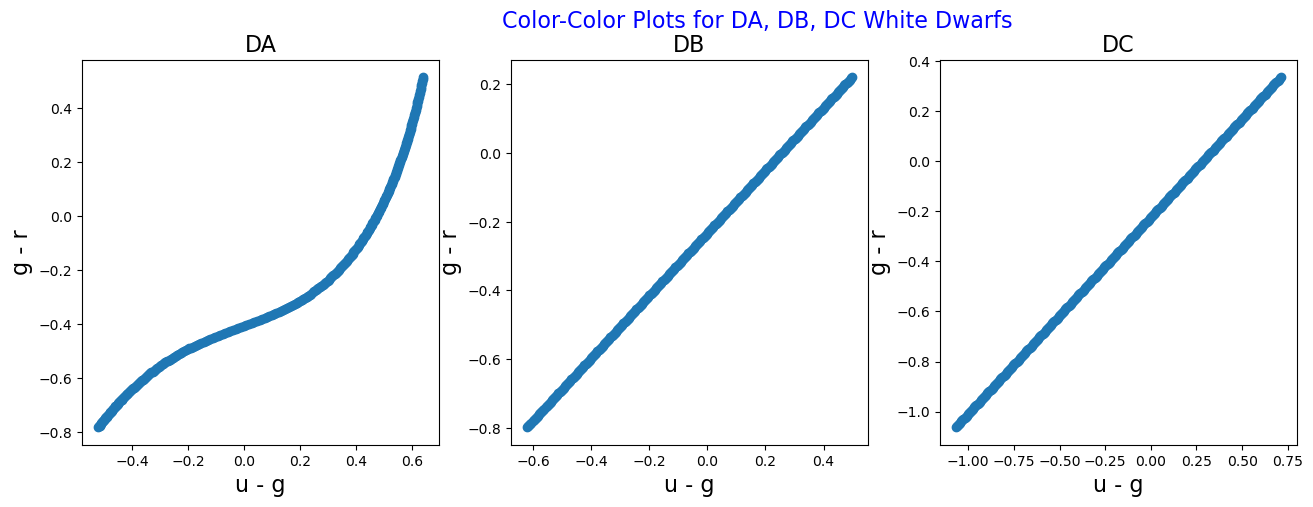

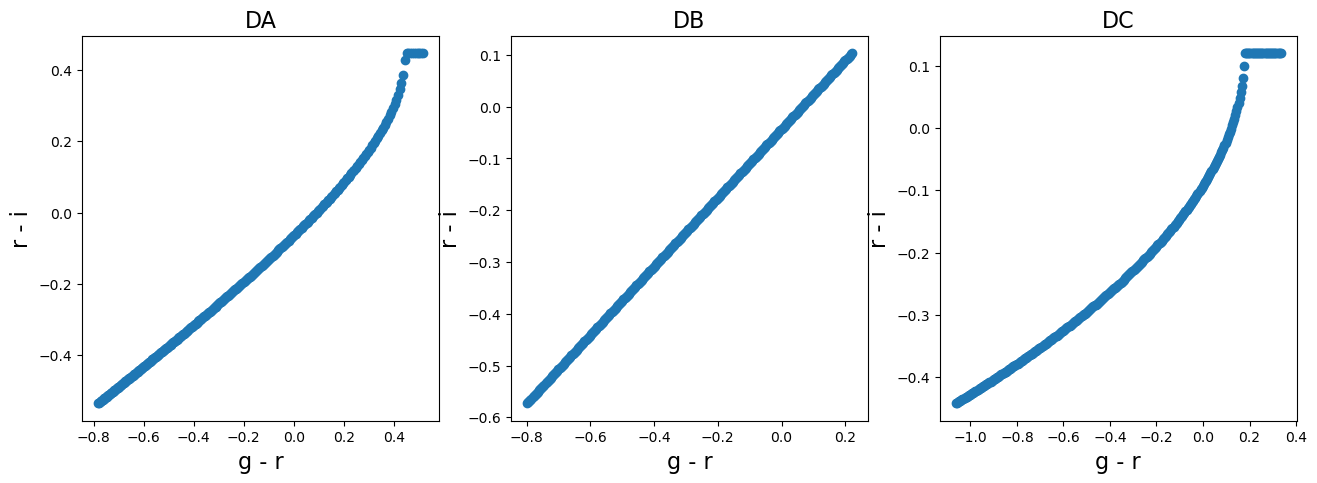

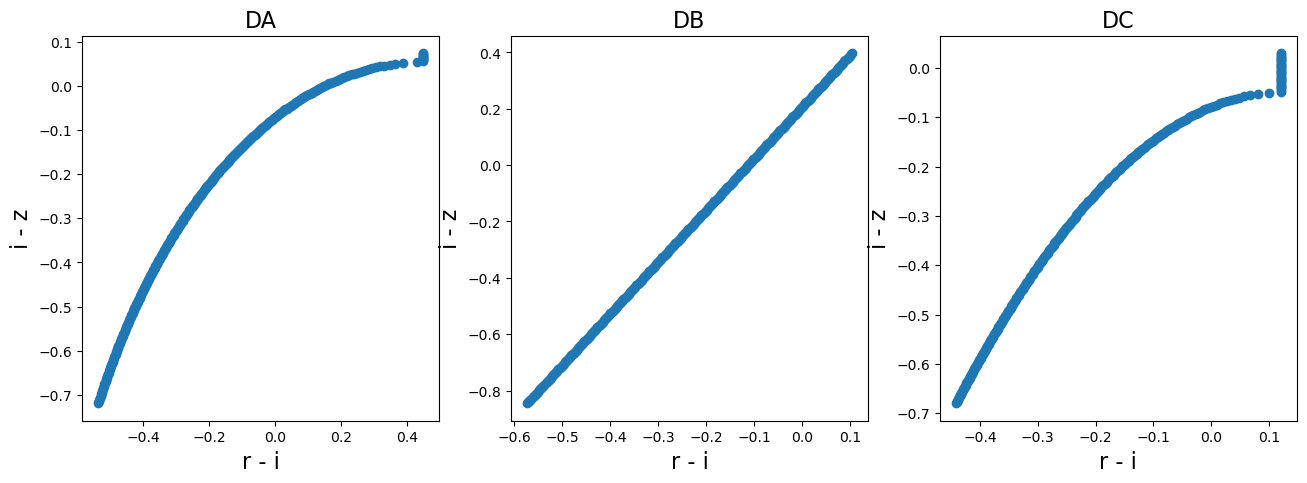

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle('Color-Color Plots for DA, DB, DC White Dwarfs', fontsize=16, color='blue')
for i in range(len(ax)):
    ax[i].set_xlabel('u - g', fontsize=16)
    ax[i].set_ylabel('g - r', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WD['DAug'], df_WD['DAgr']) 
im = ax[1].scatter(df_WD['DBug'], df_WD['DBgr']) 
im = ax[2].scatter(df_WD['DCug'], df_WD['DCgr'])
fig.subplots_adjust(right=0.8)


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('g - r', fontsize=16)
    ax[i].set_ylabel('r - i', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WD['DAgr'], df_WD['DAri']) 
im = ax[1].scatter(df_WD['DBgr'], df_WD['DBri']) 
im = ax[2].scatter(df_WD['DCgr'], df_WD['DCri'])
fig.subplots_adjust(right=0.8)


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('r - i', fontsize=16)
    ax[i].set_ylabel('i - z', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WD['DAri'], df_WD['DAiz']) 
im = ax[1].scatter(df_WD['DBri'], df_WD['DBiz']) 
im = ax[2].scatter(df_WD['DCri'], df_WD['DCiz'])
fig.subplots_adjust(right=0.8)


##### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> III.B.2 WD Color-Magnitude Plots


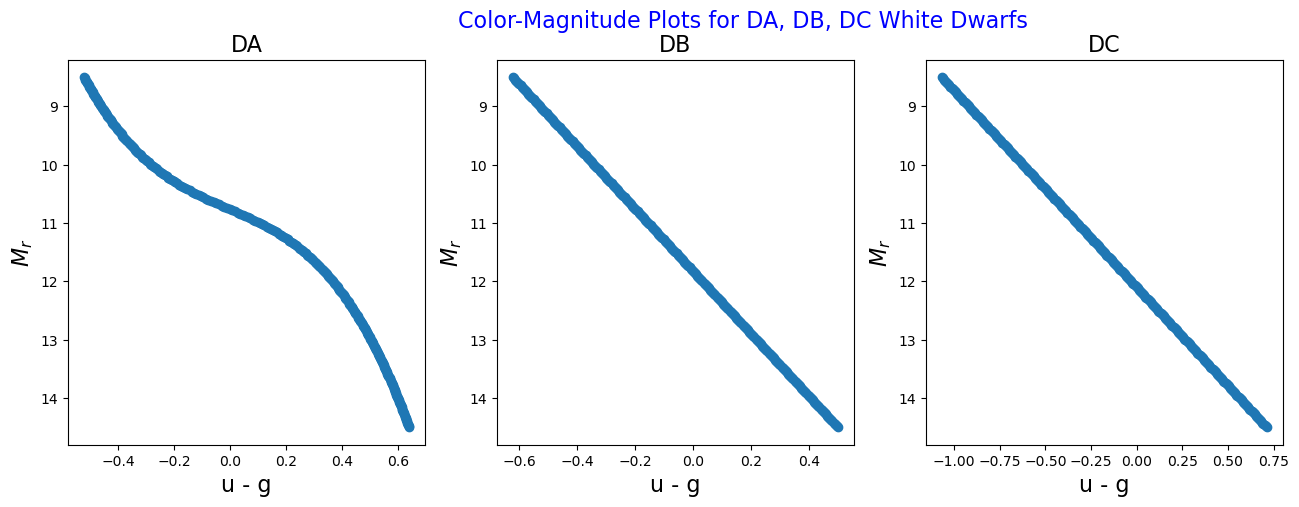

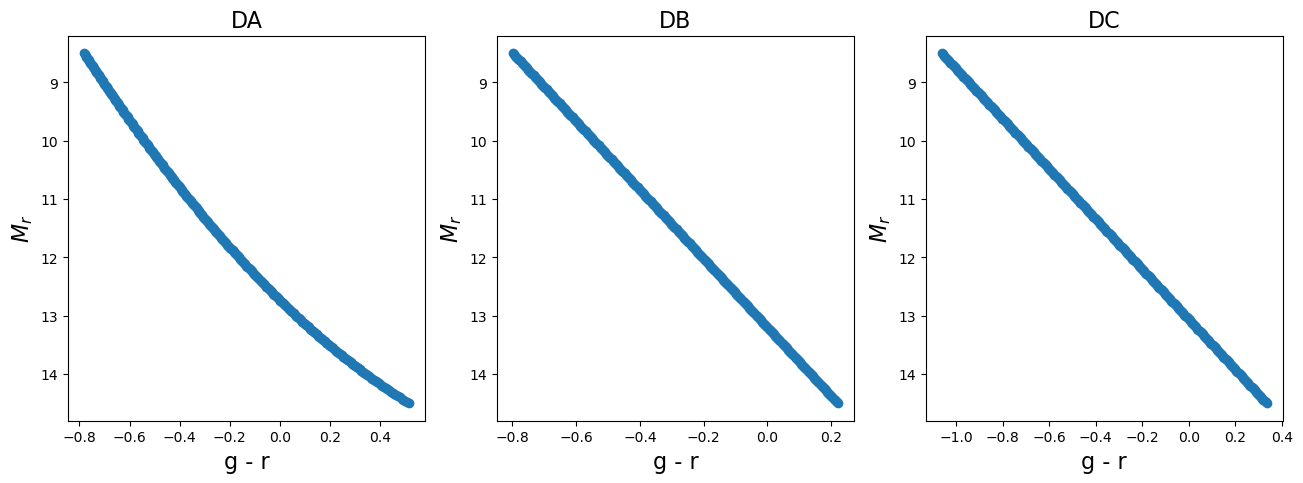

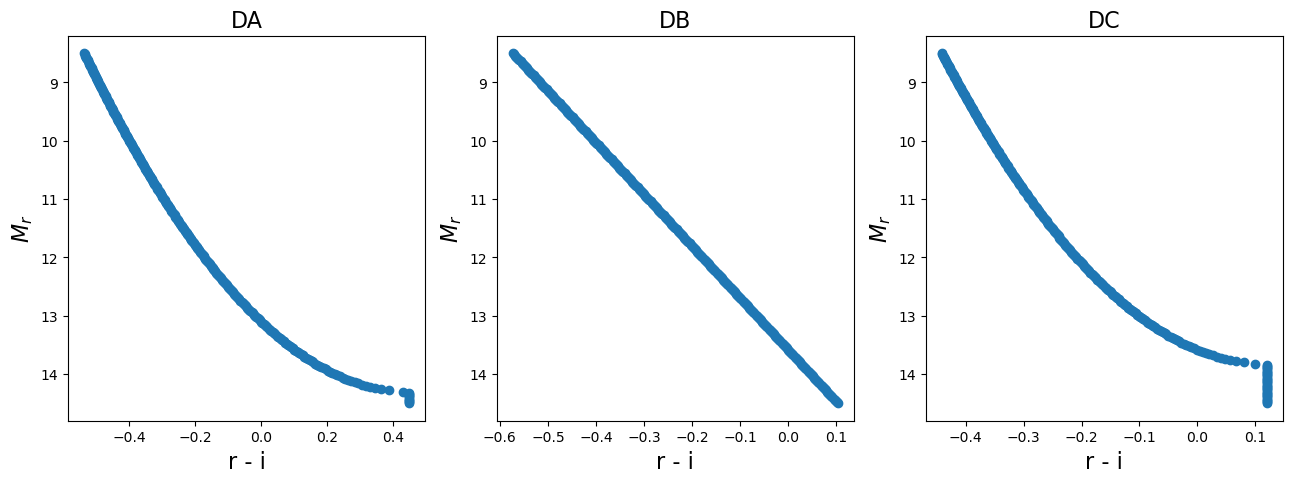

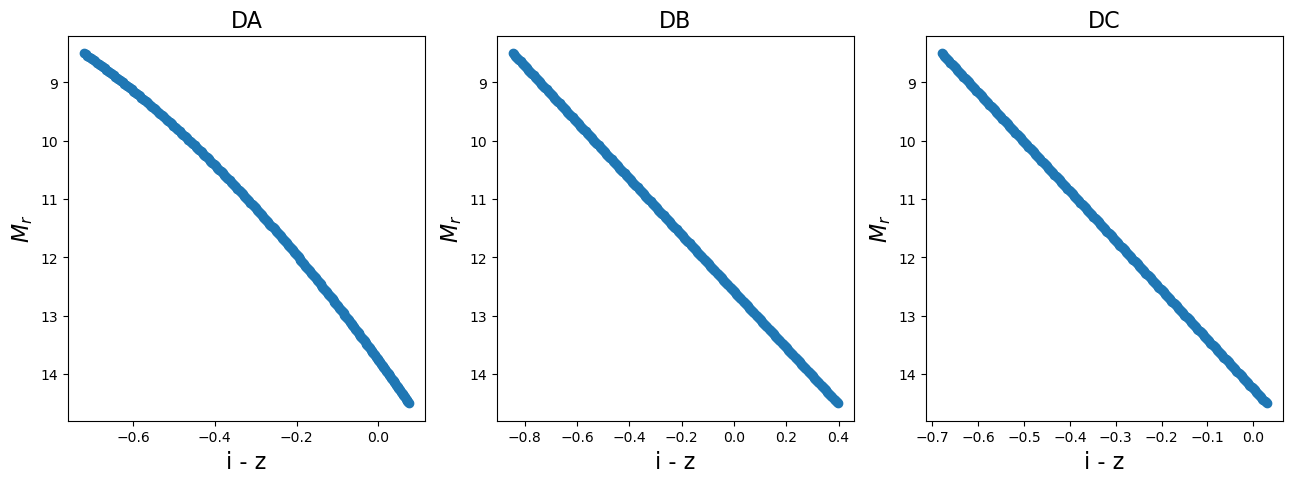

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle('Color-Magnitude Plots for DA, DB, DC White Dwarfs', fontsize=16, color='blue')
for i in range(len(ax)):
    ax[i].set_xlabel('u - g', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
    
im = ax[0].scatter(df_WD['DAug'], df_WD['Mr']) 
im = ax[1].scatter(df_WD['DBug'], df_WD['Mr']) 
im = ax[2].scatter(df_WD['DCug'], df_WD['Mr'])
fig.subplots_adjust(right=0.8)

fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('g - r', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
    
im = ax[0].scatter(df_WD['DAgr'], df_WD['Mr']) 
im = ax[1].scatter(df_WD['DBgr'], df_WD['Mr']) 
im = ax[2].scatter(df_WD['DCgr'], df_WD['Mr'])
fig.subplots_adjust(right=0.8)


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('r - i', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()

im = ax[0].scatter(df_WD['DAri'], df_WD['Mr']) 
im = ax[1].scatter(df_WD['DBri'], df_WD['Mr']) 
im = ax[2].scatter(df_WD['DCri'], df_WD['Mr'])
fig.subplots_adjust(right=0.8)

fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('i - z', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()

im = ax[0].scatter(df_WD['DAiz'], df_WD['Mr']) 
im = ax[1].scatter(df_WD['DBiz'], df_WD['Mr']) 
im = ax[2].scatter(df_WD['DCiz'], df_WD['Mr'])
fig.subplots_adjust(right=0.8)


### <span style="color:blue"> IV. White Dwarf/M Dwarf (WDMD) Binary Systems
#### &ensp;&ensp;&ensp; <span style="color:blue"> IV.A. WDMD Table Descriptions


In [8]:
print('White Dwarf /M Dwarf catalog (WDMD.csv) column names and lengths:')
print(df_WDMD.info())

White Dwarf /M Dwarf catalog (WDMD.csv) column names and lengths:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3721 entries, 0 to 3720
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DAh_rfratio  3721 non-null   float64
 1   DAh_Mr       3721 non-null   float64
 2   DAh_ug       3721 non-null   float64
 3   DAh_gr       3721 non-null   float64
 4   DAh_ri       3721 non-null   float64
 5   DAh_iz       3721 non-null   float64
 6   DAh_deltaMr  3721 non-null   float64
 7   DAd_rfratio  3721 non-null   float64
 8   DAd_Mr       3721 non-null   float64
 9   DAd_ug       3721 non-null   float64
 10  DAd_gr       3721 non-null   float64
 11  DAd_ri       3721 non-null   float64
 12  DAd_iz       3721 non-null   float64
 13  DAd_deltaMr  3721 non-null   float64
 14  DBh_rfratio  3721 non-null   float64
 15  DBh_Mr       3721 non-null   float64
 16  DBh_ug       3721 non-null   float64
 17  DBh_gr       3721 non-nu

In [9]:
print('Data sample for White Dwarf/ M Dwarf catalog:')
df_WDMD.head()

Data sample for White Dwarf/ M Dwarf catalog:


,DAh_rfratio,DAh_Mr,DAh_ug,DAh_gr,DAh_ri,DAh_iz,DAh_deltaMr,DAd_rfratio,DAd_Mr,DAd_ug,...,DCh_ri,DCh_iz,DCh_deltaMr,DCd_rfratio,DCd_Mr,DCd_ug,DCd_gr,DCd_ri,DCd_iz,DCd_deltaMr
0,1.000000,7.747425,-0.372386,-0.187979,0.100090,0.048690,0.0,1.000000,7.747425,-0.390302,...,0.127110,0.041047,0.0,1.000000,7.747425,-0.962438,-0.418385,0.317511,0.193853,0.0
1,1.096478,7.796274,-0.386969,-0.220978,0.089832,0.045195,-0.1,1.096478,7.796274,-0.401416,...,0.118344,0.037199,-0.1,1.096478,7.796274,-0.971502,-0.457805,0.310931,0.195854,-0.1
2,1.202264,7.842826,-0.400074,-0.253330,0.078933,0.041161,-0.2,1.202264,7.842826,-0.411568,...,0.108973,0.032820,-0.2,1.202264,7.842826,-0.979761,-0.495767,0.303183,0.197333,-0.2
3,1.318257,7.887096,-0.411826,-0.284902,0.067288,0.036719,-0.3,1.318257,7.887096,-0.420829,...,0.098892,0.028041,-0.3,1.318257,7.887096,-0.987279,-0.532219,0.294448,0.198397,-0.3
4,1.445440,7.929108,-0.422376,-0.315549,0.055140,0.031829,-0.4,1.445440,7.929108,-0.429310,...,0.088336,0.022826,-0.4,1.445440,7.929108,-0.994148,-0.567089,0.284484,0.198795,-0.4


In [10]:
print('Sample statistics for the White Dwarf/M Dwarf catalog:')
df_WDMD.describe()

Sample statistics for the White Dwarf/M Dwarf catalog:


,DAh_rfratio,DAh_Mr,DAh_ug,DAh_gr,DAh_ri,DAh_iz,DAh_deltaMr,DAd_rfratio,DAd_Mr,DAd_ug,...,DCh_ri,DCh_iz,DCh_deltaMr,DCd_rfratio,DCd_Mr,DCd_ug,DCd_gr,DCd_ri,DCd_iz,DCd_deltaMr
count,3721.000000,3721.000000,3721.000000,3721.000000,3721.000000,3721.000000,3721.000000,3721.000000,3721.000000,3721.000000,...,3721.000000,3721.000000,3721.000000,3721.000000,3721.000000,3721.000000,3721.000000,3721.000000,3721.000000,3721.000000
mean,8.656106,10.227323,0.585325,0.336353,0.503711,0.352879,0.000000,8.656106,10.227323,0.592627,...,0.511957,0.345717,0.000000,8.656106,10.227323,0.276317,0.245753,0.688562,0.471780,0.000000
std,22.897590,1.353780,0.848671,0.683925,0.484106,0.296869,2.490315,22.897590,1.353780,0.865921,...,0.462391,0.303540,2.490315,22.897590,1.353780,0.991634,0.769008,0.521277,0.303346,2.490315
min,0.003981,7.747425,-0.520258,-0.777169,-0.497137,-0.554737,-6.000000,0.003981,7.747425,-0.520258,...,-0.406554,-0.533589,-6.000000,0.003981,7.747425,-1.066924,-1.058111,-0.406554,-0.533589,-6.000000
25%,0.190546,9.087037,-0.199015,-0.301035,0.139183,0.194946,-1.800000,0.190546,9.087037,-0.201277,...,0.154883,0.178864,-1.800000,0.190546,9.087037,-0.558998,-0.454675,0.290078,0.331012,-1.800000
50%,1.000000,10.026033,0.465797,0.320334,0.537612,0.354207,0.000000,1.000000,10.026033,0.462205,...,0.536138,0.347975,0.000000,1.000000,10.026033,0.058785,0.238656,0.777938,0.504162,0.000000
75%,5.248075,11.213252,1.172446,1.011090,0.854198,0.557768,1.800000,5.248075,11.213252,1.171875,...,0.846898,0.554691,1.800000,5.248075,11.213252,0.957740,0.989973,1.094399,0.691390,1.800000
max,251.188643,13.747425,2.407078,1.365178,1.565681,0.966841,6.000000,251.188643,13.747425,2.509572,...,1.525927,0.987274,6.000000,251.188643,13.747425,2.505662,1.377768,1.590186,0.987274,6.000000


#### &ensp;&ensp;&ensp; <span style="color:blue"> IV.B. WDMD Plots


<span style="color:blue"> In each case, u-g and g-r colors 
    show the most variation between the DA, DB and DC white dwarf types. There appears to much less difference between halo and disk values for a given WD type and color.

##### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> IV.B.1 WDMD Color-Color Plots
##### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> WDMD Disk Objects


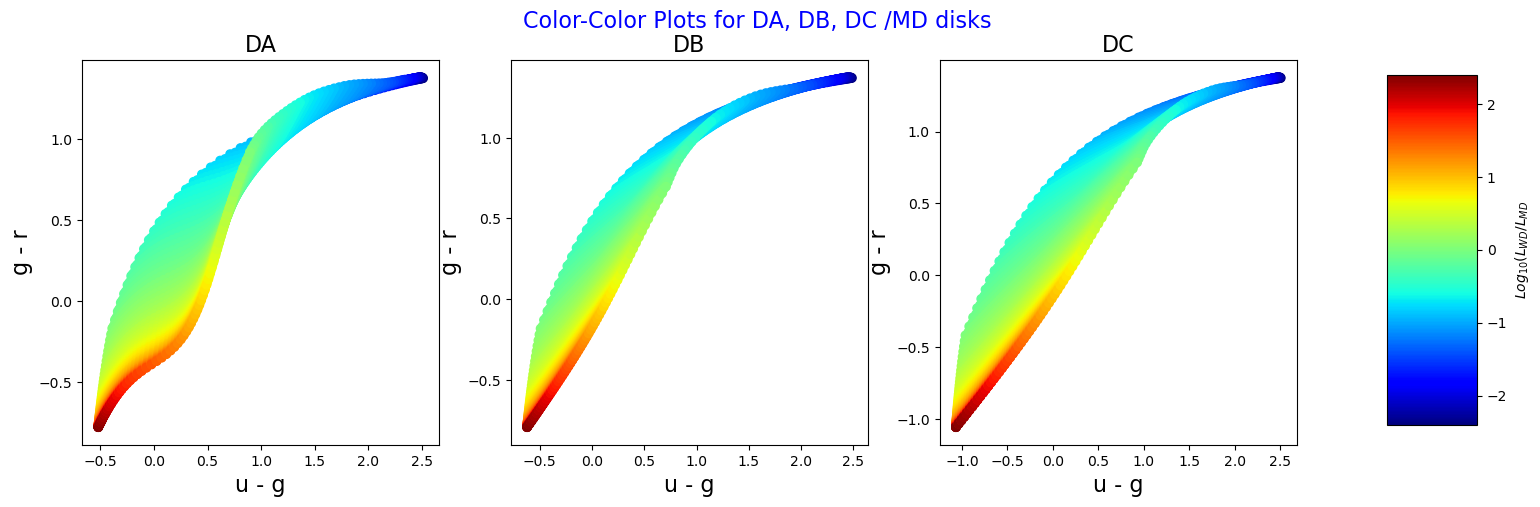

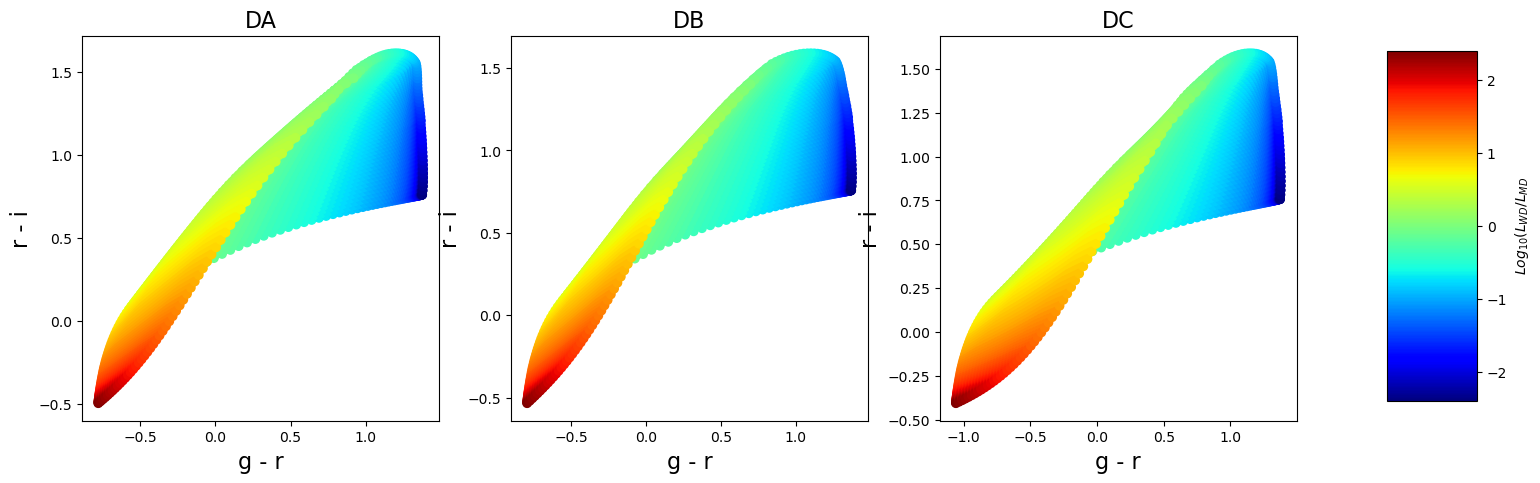

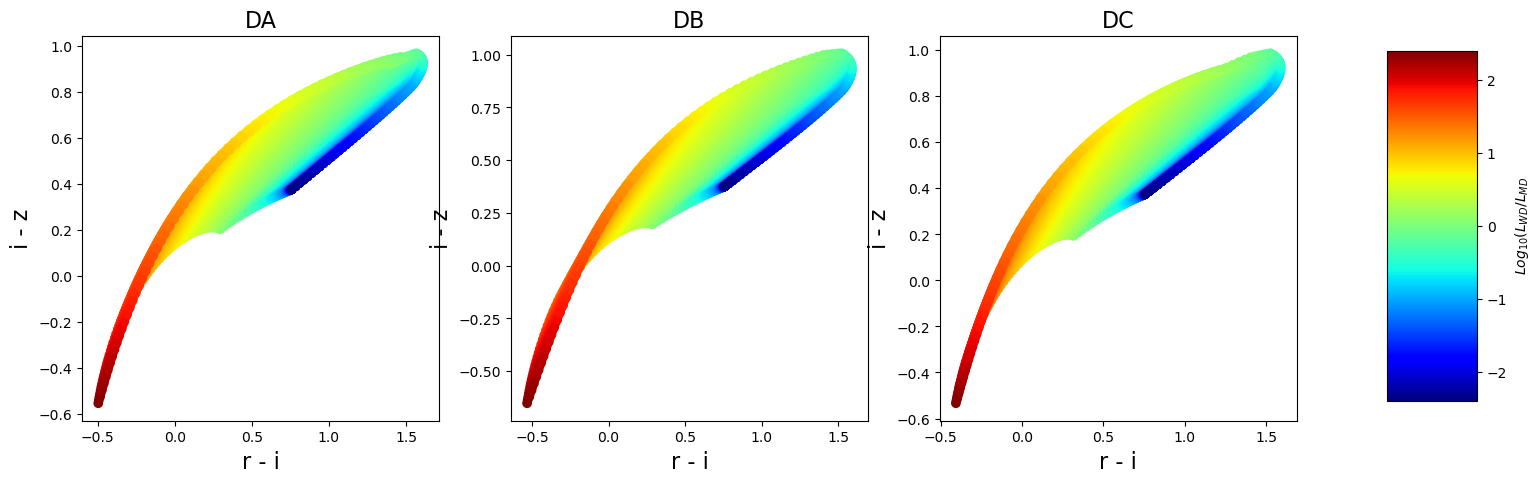

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

for i in range(len(ax)):
    ax[i].set_xlabel('u - g', fontsize=16)
    ax[i].set_ylabel('g - r', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD['DAd_ug'], df_WDMD['DAd_gr'], c=np.log10(df_WDMD['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD['DBd_ug'], df_WDMD['DBd_gr'], c=np.log10(df_WDMD['DBd_rfratio']), 
                       cmap=cmap)
im = ax[2].scatter(df_WDMD['DCd_ug'], df_WDMD['DCd_gr'], c=np.log10(df_WDMD['DCd_rfratio']), 
                       cmap=cmap)

fig.suptitle('Color-Color Plots for DA, DB, DC /MD disks', fontsize=16, color='blue')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')

fig, ax = plt.subplots(1, 3, figsize=(18,5))

for i in range(len(ax)):
    ax[i].set_xlabel('g - r', fontsize=16)
    ax[i].set_ylabel('r - i', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD['DAd_gr'], df_WDMD['DAd_ri'], c=np.log10(df_WDMD['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD['DBd_gr'], df_WDMD['DBd_ri'], c=np.log10(df_WDMD['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD['DCd_gr'], df_WDMD['DCd_ri'], c=np.log10(df_WDMD['DCd_rfratio']), 
                       cmap=cmap, label='DC')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')

fig, ax = plt.subplots(1, 3, figsize=(18,5))
WD = ['DA', 'DB', 'DC']

for i in range(len(ax)):
    ax[i].set_xlabel('r - i', fontsize=16)
    ax[i].set_ylabel('i - z', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD['DAd_ri'], df_WDMD['DAd_iz'], c=np.log10(df_WDMD['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD['DBd_ri'], df_WDMD['DBd_iz'], c=np.log10(df_WDMD['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD['DCd_ri'], df_WDMD['DCd_iz'], c=np.log10(df_WDMD['DCd_rfratio']), 
                       cmap=cmap, label='DC')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')

##### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> WDMD Halo Objects


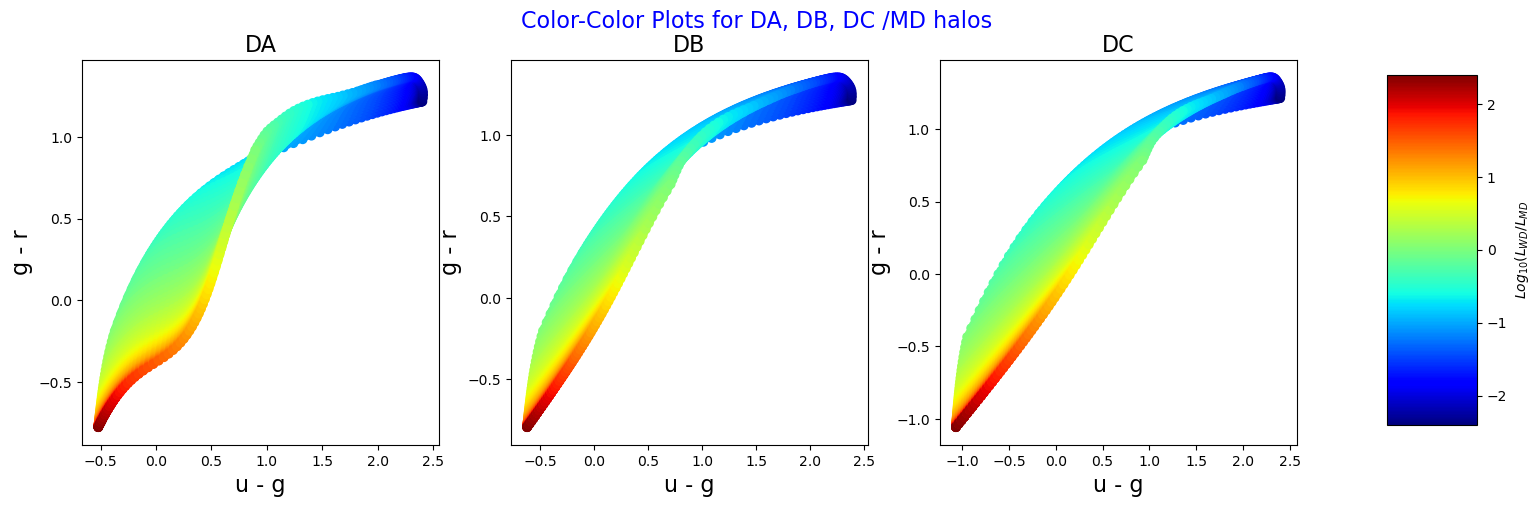

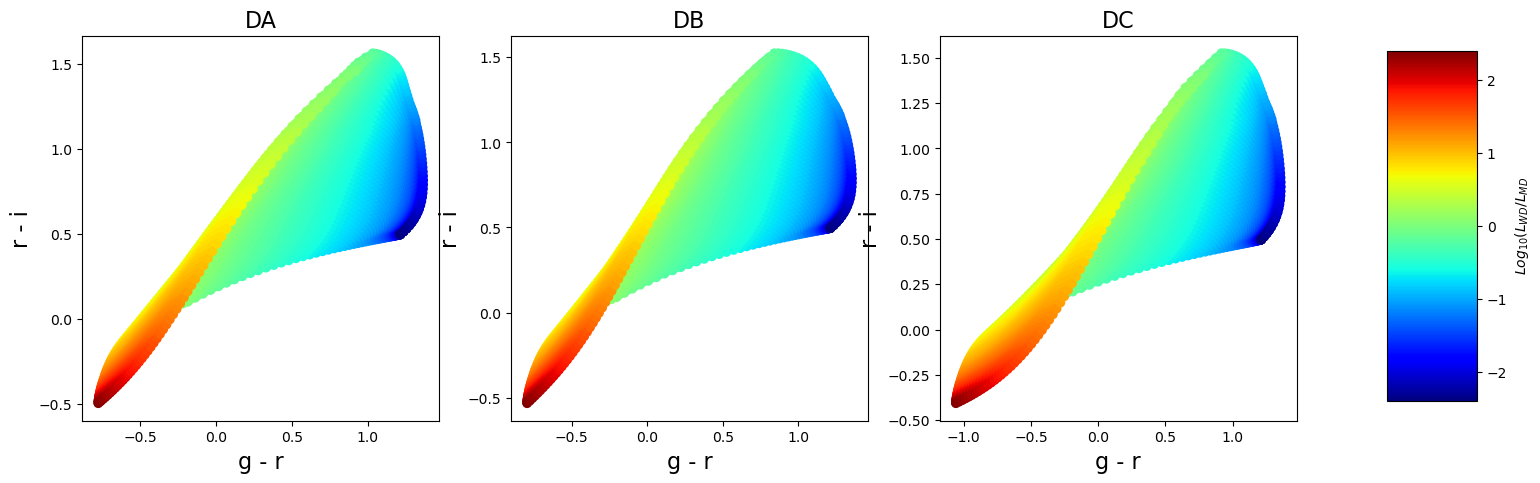

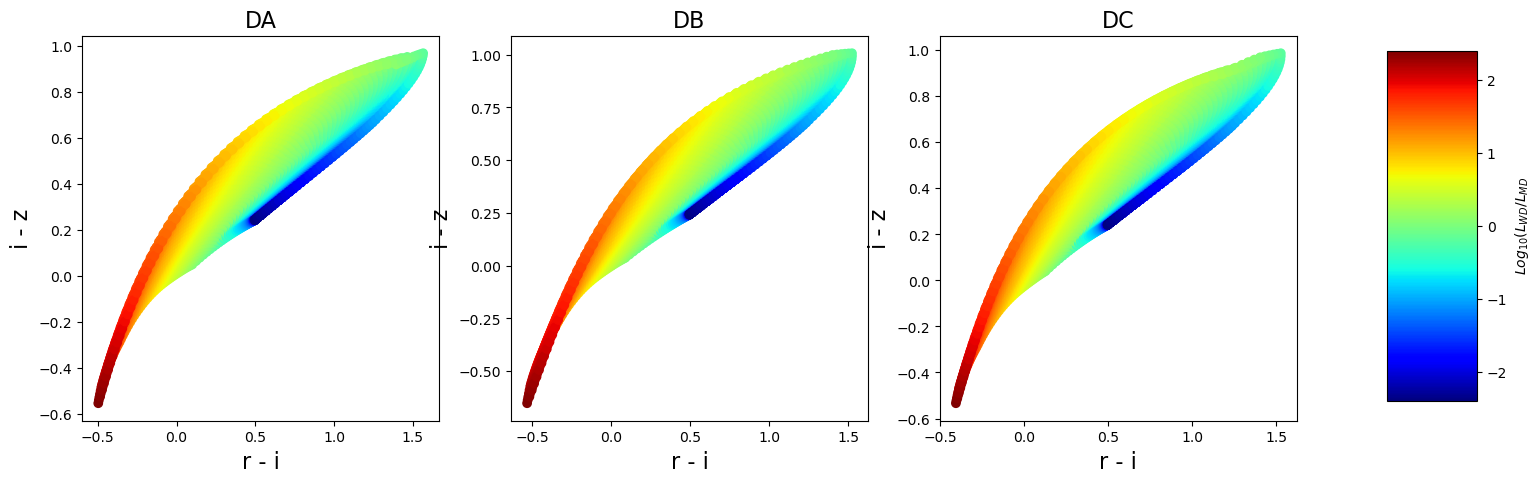

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

for i in range(len(ax)):
    ax[i].set_xlabel('u - g', fontsize=16)
    ax[i].set_ylabel('g - r', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD['DAh_ug'], df_WDMD['DAh_gr'], c=np.log10(df_WDMD['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD['DBh_ug'], df_WDMD['DBh_gr'], c=np.log10(df_WDMD['DBh_rfratio']), 
                       cmap=cmap)
im = ax[2].scatter(df_WDMD['DCh_ug'], df_WDMD['DCh_gr'], c=np.log10(df_WDMD['DCh_rfratio']), 
                       cmap=cmap)

fig.suptitle('Color-Color Plots for DA, DB, DC /MD halos', fontsize=16, color='blue')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')

fig, ax = plt.subplots(1, 3, figsize=(18,5))

for i in range(len(ax)):
    ax[i].set_xlabel('g - r', fontsize=16)
    ax[i].set_ylabel('r - i', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD['DAh_gr'], df_WDMD['DAh_ri'], c=np.log10(df_WDMD['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD['DBh_gr'], df_WDMD['DBh_ri'], c=np.log10(df_WDMD['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD['DCh_gr'], df_WDMD['DCh_ri'], c=np.log10(df_WDMD['DCh_rfratio']), 
                       cmap=cmap, label='DC')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')

fig, ax = plt.subplots(1, 3, figsize=(18,5))
WD = ['DA', 'DB', 'DC']

for i in range(len(ax)):
    ax[i].set_xlabel('r - i', fontsize=16)
    ax[i].set_ylabel('i - z', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD['DAh_ri'], df_WDMD['DAh_iz'], c=np.log10(df_WDMD['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD['DBh_ri'], df_WDMD['DBh_iz'], c=np.log10(df_WDMD['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD['DCh_ri'], df_WDMD['DCh_iz'], c=np.log10(df_WDMD['DCh_rfratio']), 
                       cmap=cmap, label='DC')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')

##### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> IV.B.2 WDMD Color-Magnitude Plots
##### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> WDMD Disk Objects


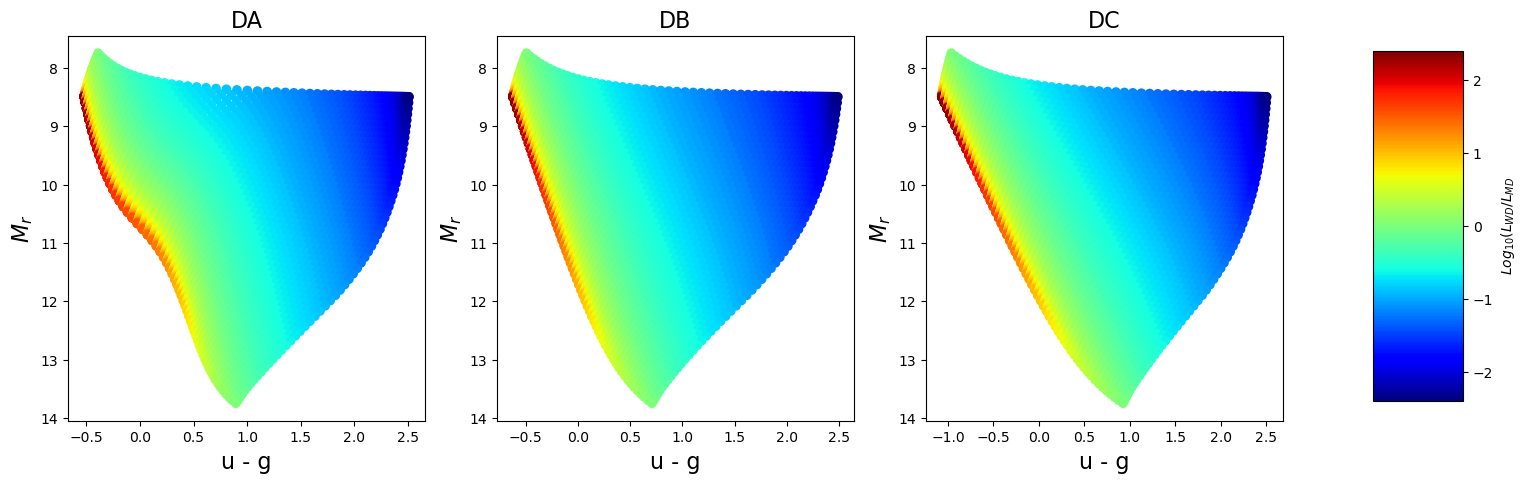

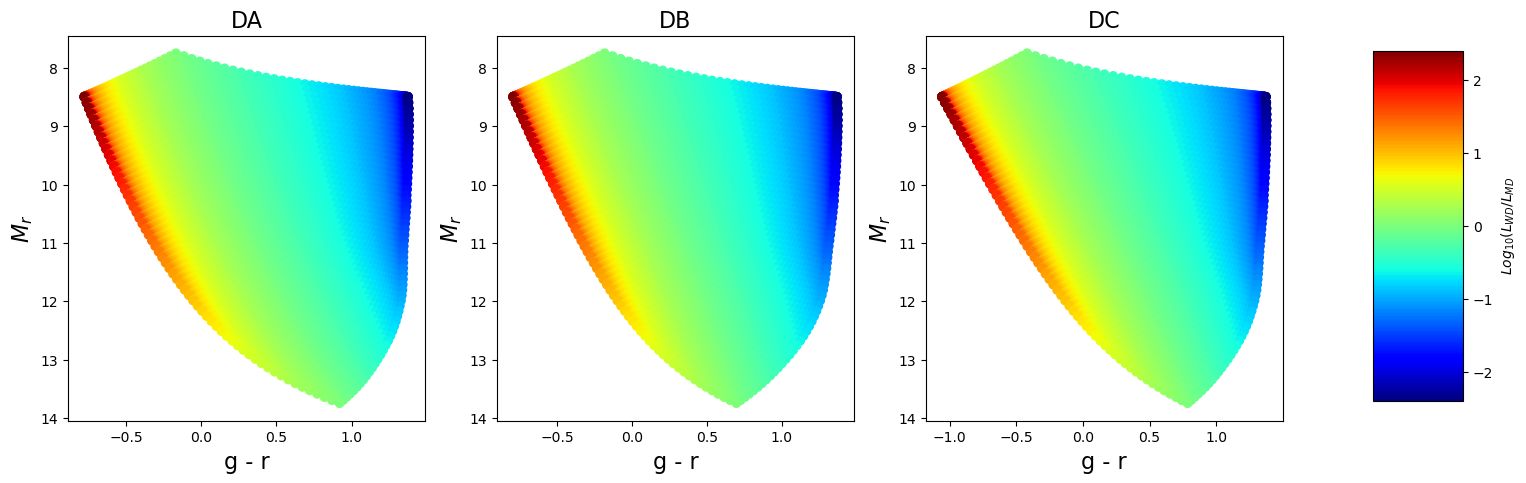

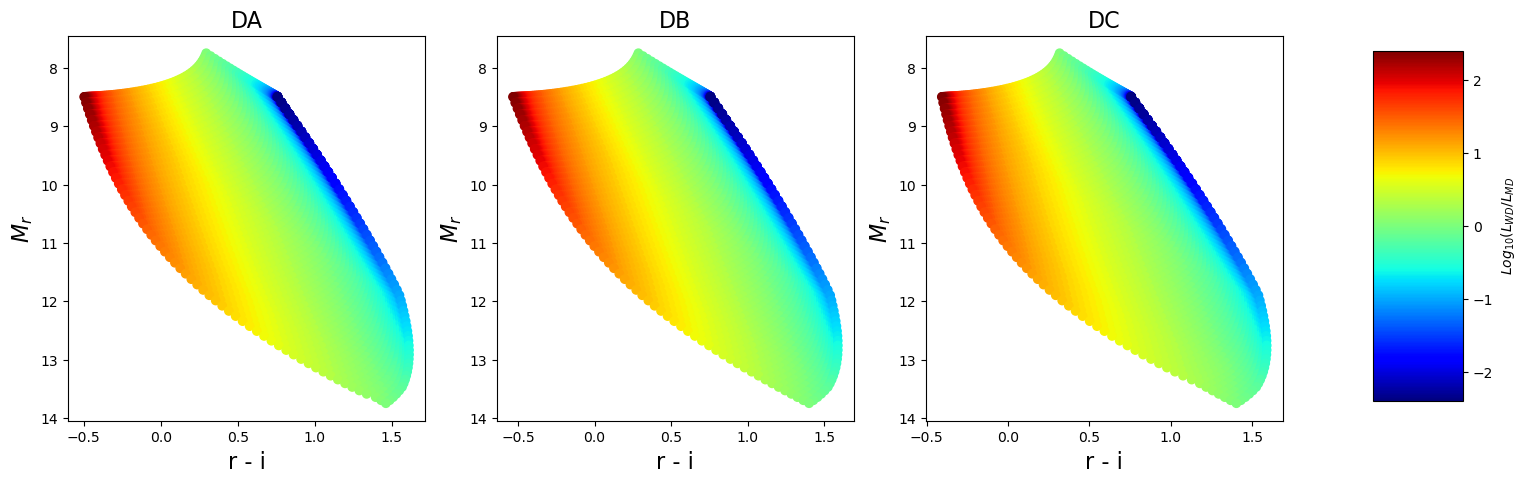

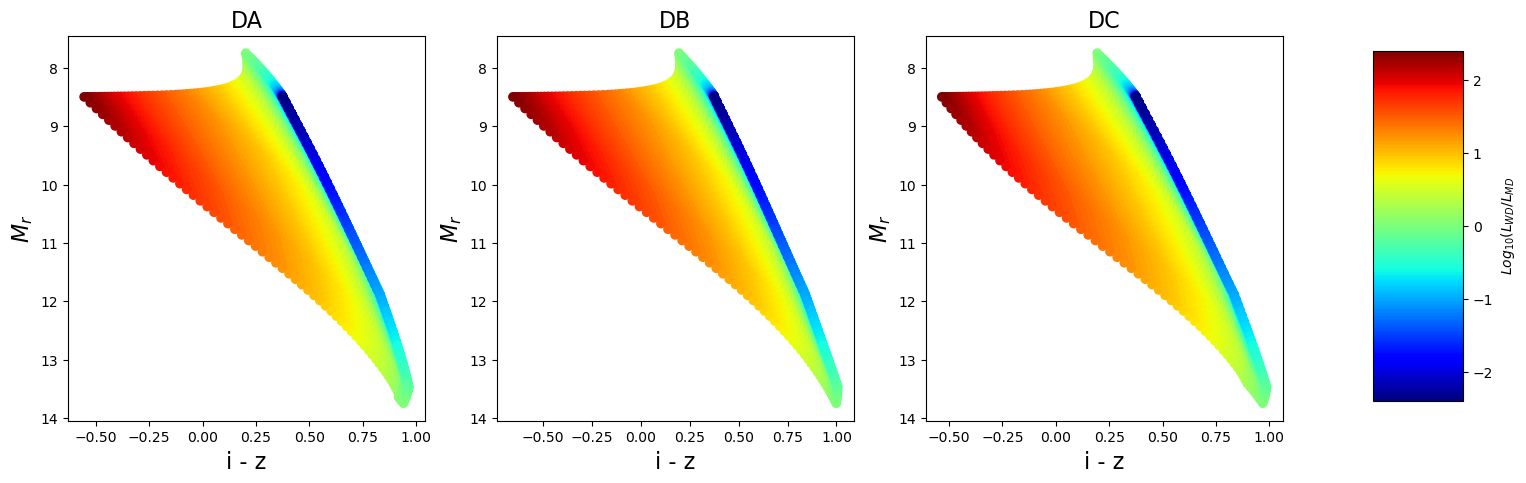

In [13]:
WD = ['DA', 'DB', 'DC']

fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('u - g', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD['DAd_ug'], df_WDMD['DAd_Mr'], c=np.log10(df_WDMD['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD['DBd_ug'], df_WDMD['DBd_Mr'], c=np.log10(df_WDMD['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD['DCd_ug'], df_WDMD['DCd_Mr'], c=np.log10(df_WDMD['DCd_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('g - r', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD['DAd_gr'], df_WDMD['DAd_Mr'], c=np.log10(df_WDMD['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD['DBd_gr'], df_WDMD['DBd_Mr'], c=np.log10(df_WDMD['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD['DCd_gr'], df_WDMD['DCd_Mr'], c=np.log10(df_WDMD['DCd_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('r - i', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD['DAd_ri'], df_WDMD['DAd_Mr'], c=np.log10(df_WDMD['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD['DBd_ri'], df_WDMD['DBd_Mr'], c=np.log10(df_WDMD['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD['DCd_ri'], df_WDMD['DCd_Mr'], c=np.log10(df_WDMD['DCd_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('i - z', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD['DAd_iz'], df_WDMD['DAd_Mr'], c=np.log10(df_WDMD['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD['DBd_iz'], df_WDMD['DBd_Mr'], c=np.log10(df_WDMD['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD['DCd_iz'], df_WDMD['DCd_Mr'], c=np.log10(df_WDMD['DCd_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')



##### &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; <span style="color:blue"> WDMD Halo Objects


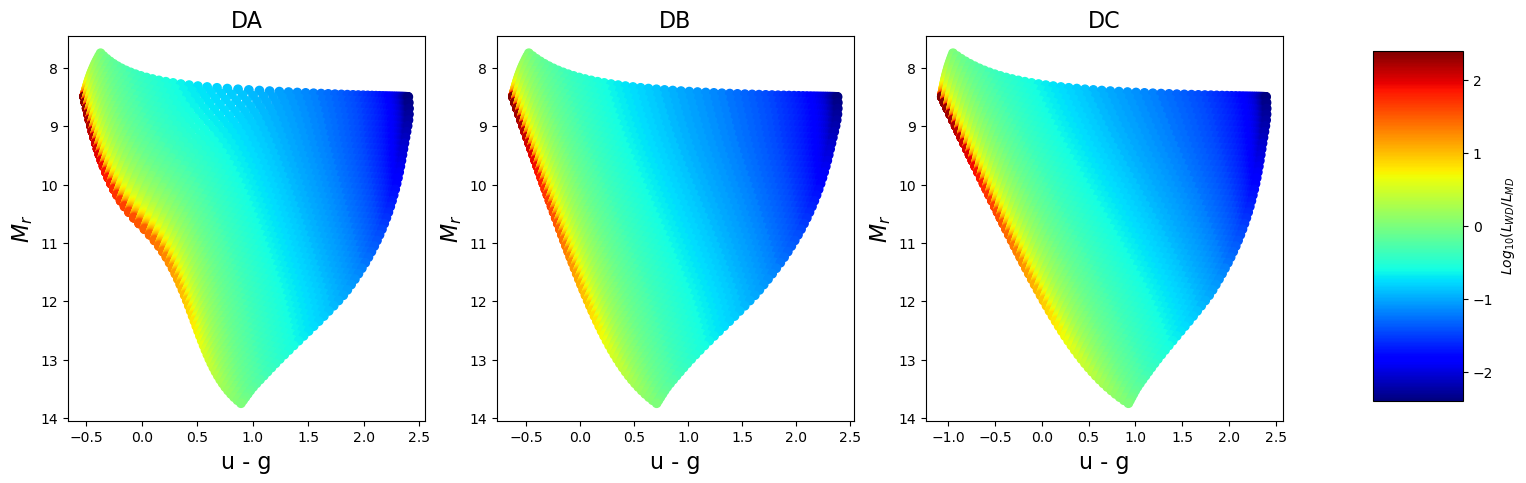

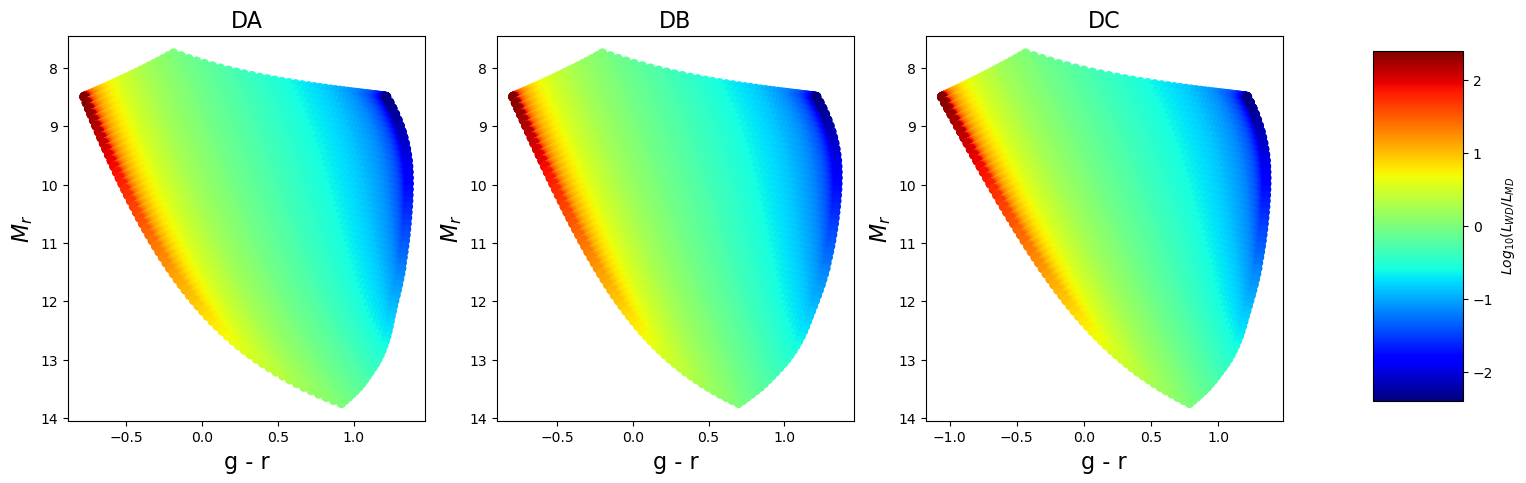

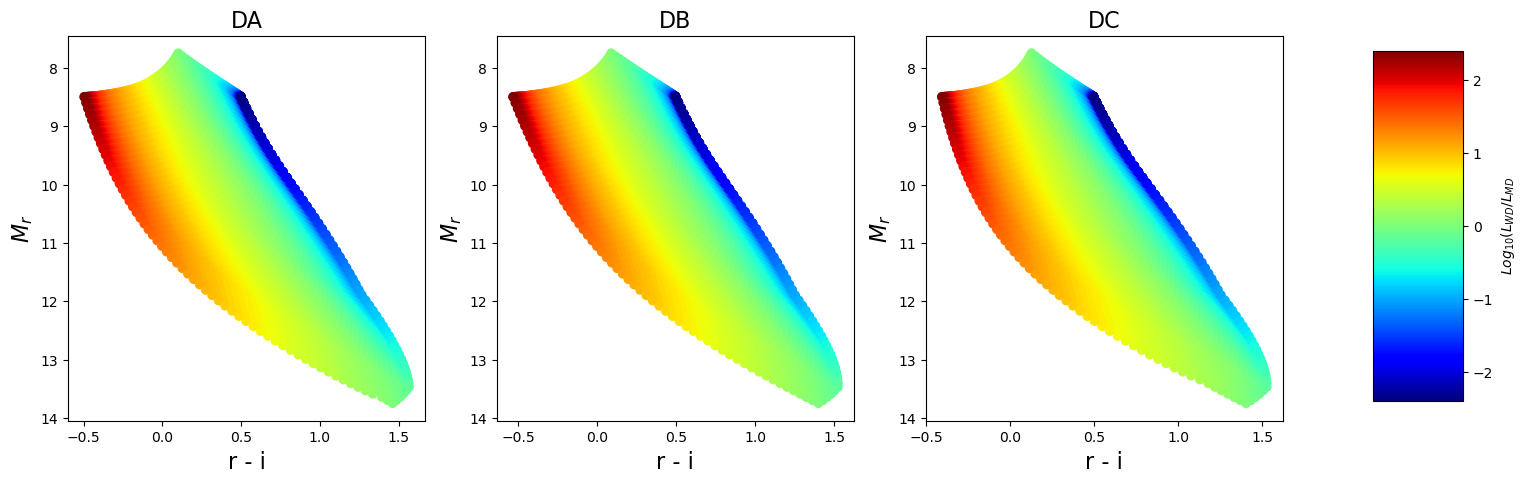

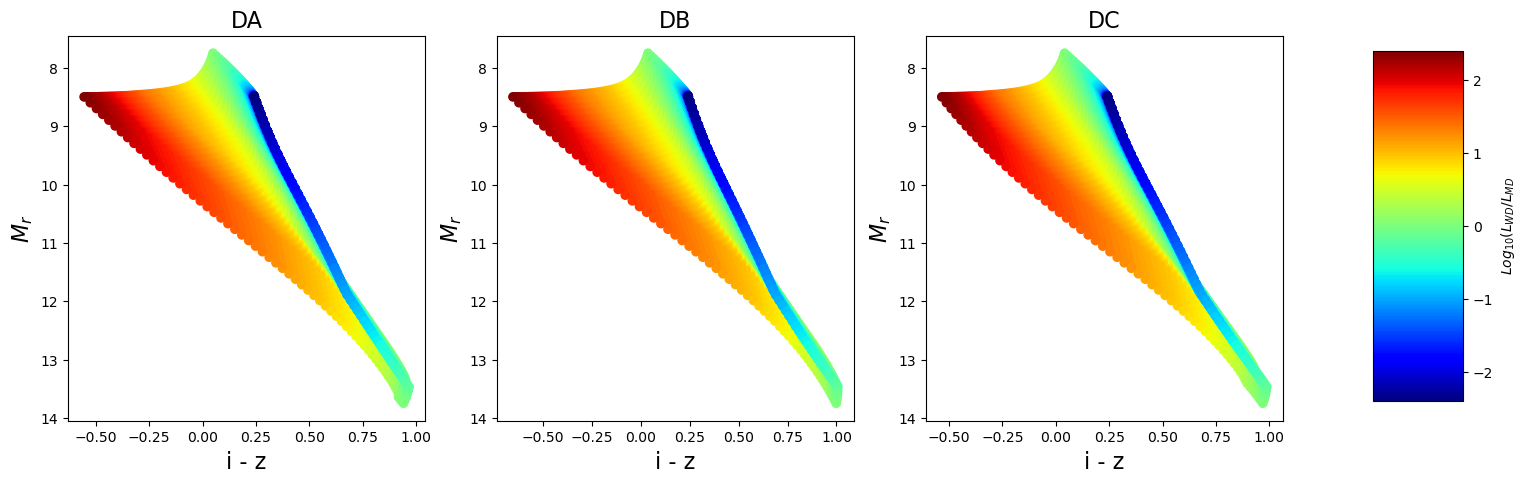

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('u - g', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD['DAh_ug'], df_WDMD['DAh_Mr'], c=np.log10(df_WDMD['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD['DBh_ug'], df_WDMD['DBh_Mr'], c=np.log10(df_WDMD['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD['DCh_ug'], df_WDMD['DCh_Mr'], c=np.log10(df_WDMD['DCh_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('g - r', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD['DAh_gr'], df_WDMD['DAh_Mr'], c=np.log10(df_WDMD['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD['DBh_gr'], df_WDMD['DBh_Mr'], c=np.log10(df_WDMD['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD['DCh_gr'], df_WDMD['DCh_Mr'], c=np.log10(df_WDMD['DCh_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('r - i', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD['DAh_ri'], df_WDMD['DAh_Mr'], c=np.log10(df_WDMD['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD['DBh_ri'], df_WDMD['DBh_Mr'], c=np.log10(df_WDMD['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD['DCh_ri'], df_WDMD['DCh_Mr'], c=np.log10(df_WDMD['DCh_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('i - z', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD['DAh_iz'], df_WDMD['DAh_Mr'], c=np.log10(df_WDMD['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD['DBh_iz'], df_WDMD['DBh_Mr'], c=np.log10(df_WDMD['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD['DCh_iz'], df_WDMD['DCh_Mr'], c=np.log10(df_WDMD['DCh_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')
